In [2]:
import pandas as pd

In [3]:
df_teewts = pd.read_csv("https://github.com/murpi/wilddata/raw/master/quests/tweets.zip")

In [4]:
df_teewts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
df_teewts.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Entraîne-toi à classifier des tweets pour dire s'ils sont positifs ou négatifs. Ca pourrait être un outil très utile pour optimiser le travail d'un community manager.

1/ Importe cet ensemble de données de tweets dans un DataFrame.


In [19]:
df_teewts['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
neutral     40.45
positive    31.23
negative    28.32
Name: proportion, dtype: float64


2/ Ne garde que les tweets positifs et négatifs (tu excluras donc les neutral). Quel est le pourcentage de tweets positifs/négatifs ?

In [18]:
df_0 = df_teewts[~df_teewts['sentiment'].str.contains("neutral")]
df_0['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
positive    52.45
negative    47.55
Name: proportion, dtype: float64

3/ Copie la colonne text dans une Série X, et la colonne sentiment dans une Série y. Applique un train test split avec le random_state = 32 et un train_size de 0.75.

4/ Crée un modèle vectorizer avec scikit-learn en utilisant la méthode Countvectorizer. Entraîne ton modèle sur X_train, puis crée une matrice de features X_train_CV. Crée la matrice X_test_CV sans ré-entraîner le modèle. Le format de la matrice X_test_CV doit être 4091x15806 avec 44633 stored elements.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()

X = df_0['text']
y = df_0['sentiment']

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=32, train_size=0.75)

vectorizer.fit(X_train, y_train)

CountVectorizer()

In [27]:
X_train_CV = vectorizer.transform(X_train)
X_train_CV

<12272x15806 sparse matrix of type '<class 'numpy.int64'>'
	with 144578 stored elements in Compressed Sparse Row format>

In [28]:
X_test_CV = vectorizer.transform(X_test)
X_test_CV

<4091x15806 sparse matrix of type '<class 'numpy.int64'>'
	with 44633 stored elements in Compressed Sparse Row format>

5/ Entraîne maintenant une régression logistique avec les paramètres par défaut. Tu devrais obtenir les résultats suivants : 0.966pour le test d'entraînement, et 0.877 pour l'ensemble de test.

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_CV,y_train)

model.score(X_train_CV, y_train), model.score(X_test_CV, y_test)

(0.9659387222946545, 0.8772916157418724)

6/ Étape bonus : essaye d'afficher 10 tweets qui ont été mal prédits (faux positifs ou faux négatifs). Aurais-tu fait mieux que l'algorithme ?

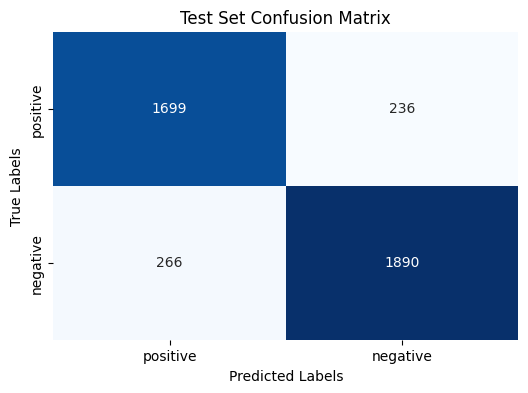

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

test_predictions = model.predict(X_test_CV)

test_conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [32]:
xmat = vectorizer.transform(X)
df_0['predict'] = model.predict(xmat)
df_0[['text', 'sentiment', 'predict']][df_0['sentiment'] != df_0['predict']].sample(10)

C:\Users\aurel\AppData\Local\Temp\ipykernel_48940\2365998294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['predict'] = model.predict(xmat)


,text,sentiment,predict
25559,"No nothing wrong with thinking he`s hot, but ...",positive,negative
11160,call me later so i can tell you all about the...,positive,negative
7407,lucky! been beggin for jury duty for years......,negative,positive
8006,"Yeah, but you`ve got admire someone who takes...",positive,negative
563,And the Sun is shinning.........at last,positive,negative
24021,"A mocha at 12:30am? My, youï¿½re brave",positive,negative
24025,"yahyan: iaaaaaaaaaaaaan, i was just joking",positive,negative
26438,I wish the sun would shine. but it won`t,negative,positive
17228,mee too it`s looks amazeeeeeee,positive,negative
11907,I`m not giving up http://bit.ly/SnjEn,positive,negative
